In [411]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt

In [412]:
# load data
df3 = pd.read_excel("mugs-analysis-full-incl-demographics.xlsx",sheet_name='for-cluster-analysis')
df3 = df3.set_index('Cust')
df1=pd.read_excel("mugs-analysis-full-incl-demographics.xlsx",sheet_name='mugs-full')

In [413]:
# probability of buying each of the three products
prob = df1.iloc[29:,55:58].reset_index()
prob = prob.apply(pd.to_numeric)
prob = prob.drop('index',axis=1)

In [414]:
prob_sum = prob.sum(axis =0)

In [415]:
df = np.dot(df3.T,prob)
df = pd.DataFrame(df)
for i in range(3):
    df.iloc[:,i] = df.iloc[:,i]/prob_sum.iloc[i]
# adding index and column name to df
idx = [df3.columns]
df.columns = ['A','B','C']
df = df.set_index(idx)

In [416]:
df

,A,B,C
IPr,18.047792,38.982200,25.957759
Iin,13.356015,8.963664,11.139006
ICp,16.360400,12.163142,12.199318
ICl,18.474953,14.565828,21.128709
Icn,20.656958,12.400454,16.648585
IBr,13.116932,12.891389,12.966526
I*pPr30,18.047792,38.982200,25.957759
I*pPr10,92.472627,220.564622,130.143038
I*pPr05,126.334541,272.875400,181.704311
I*pIn0.5,13.356015,8.963664,11.139006


In [417]:
df3_mean = df3.mean(axis=0)
loglift = np.log10(df['C']/df3_mean)
loglift

 IPr       -0.050005
Iin         0.009920
 ICp       -0.043118
 ICl        0.082434
Icn         0.015689
 IBr       -0.000475
I*pPr30    -0.050005
I*pPr10    -0.082793
I*pPr05    -0.050005
I*pIn0.5    0.009920
I*pIn1     -0.006637
I*pIn3      0.009920
I*pCp12    -0.046574
I*pCp20    -0.044642
I*pCp32    -0.046735
I*pClD      0.082434
I*pClF      0.069576
I*pClE      0.082434
I*pCnSl     0.015689
I*pCnSp    -0.002611
I*pCnLk     0.015689
I*pBrA     -0.006475
I*pBrB     -0.049209
I*pBrC      0.051141
income      0.021164
age         0.014146
sports      0.127280
gradschl    0.127366
dtype: float64

In [420]:
#loglift.sort_values()

In [421]:
# only choose basic characteristics
b_var = df3.iloc[:,:24]

In [422]:
# set seed to make sure the consistency of outcome
random.seed(410014)

In [423]:
# calculate within-cluster sum of squares averaged across all clusters (2-10 clusters)
within_cluster = []
for i in range(2,11):
    kmeansModel = KMeans(n_clusters=i, n_init=50, max_iter=100)
    kmeansModel.fit(b_var)
    ave_within_cluster_mean_sum_of_squares = (kmeansModel.inertia_) / b_var.shape[0]
    within_cluster.append(ave_within_cluster_mean_sum_of_squares)

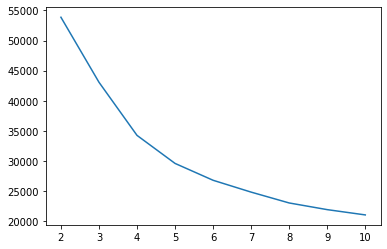

In [424]:
#find the elbow: 4
plt.plot(range(2,11), within_cluster)

In [425]:
# add labels to df
kmeansModel = KMeans(n_clusters=4, n_init=50, max_iter=100).fit(b_var)
df3['label'] = kmeansModel.labels_

In [426]:
charac = pd.DataFrame()
for i in range(4):
    col = 'Cluster' + str(i)
    charac[col] = df3[df3['label'] == i].mean(axis = 0)
charac = charac.iloc[:28]

In [427]:
charac

,Cluster0,Cluster1,Cluster2,Cluster3
IPr,45.702703,12.733333,15.888889,13.090909
Iin,8.520270,11.244444,10.873016,16.981818
ICp,8.831081,9.333333,8.888889,34.600000
ICl,12.601351,11.644444,38.650794,11.109091
Icn,11.479730,41.644444,12.809524,11.163636
IBr,12.851351,13.533333,12.857143,13.018182
I*pPr30,45.702703,12.733333,15.888889,13.090909
I*pPr10,250.263514,68.288889,82.460317,66.690909
I*pPr05,319.918919,89.133333,111.222222,91.636364
I*pIn0.5,8.520270,11.244444,10.873016,16.981818


In [431]:
loglift1 = np.log10(np.divide(charac,pd.DataFrame(df3_mean)))
loglift1

,Cluster0,Cluster1,Cluster2,Cluster3
IPr,0.195670,-0.359330,-0.263178,-0.347302
Iin,-0.106473,0.014011,-0.000577,0.193058
ICp,-0.183440,-0.159417,-0.180606,0.409622
ICl,-0.142022,-0.176320,0.344719,-0.196761
Icn,-0.145756,0.413869,-0.098155,-0.157882
IBr,-0.004350,0.018106,-0.004154,0.001252
I*pPr30,0.195670,-0.359330,-0.263178,-0.347302
I*pPr10,0.201183,-0.362864,-0.280969,-0.373147
I*pPr05,0.195670,-0.359330,-0.263178,-0.347302
I*pIn0.5,-0.106473,0.014011,-0.000577,0.193058


In [438]:
#loglift1.iloc[:,3].sort_values()